# Case study to build linear and non-liners models using scikitlearn and keras from a dataset. 

## 1. Data pre processing strategies adopted: 

#### (a) The attributes are numerical and categorical. The categorical part is converted into numerical 

#### (b) The rows with missing data are just deleted as they are few in number. We get X and y 

## 2. Model Building (linear) 

#### (a) The data is then split into train and test portions of X( data) and y (class variable)

#### (b) After instantiating each classifier ( i.e. model), the classifier is fed into the cross-validation function which returns the results in an array and all metrics are printed out 

#### (c) We have also tried out the SVD here for dimensionality reduction 

## 3. Model Building (non-linear) 

### (a) Essentially, keras sequential model is configured and then tried out with the X and y

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
df =  pd.read_csv(r'churn.csv',sep=";",skipinitialspace=True)

FileNotFoundError: File b'churn.csv' does not exist

In [6]:
df.shape

NameError: name 'df' is not defined

In [7]:
df.info()

NameError: name 'df' is not defined

In [8]:
df.head(3)

NameError: name 'df' is not defined

In [9]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace(r',', '.').astype(float)
df['TotalCharges'] = df['TotalCharges'].str.replace(r',', '.').astype(float)
df.info()

NameError: name 'df' is not defined

In [10]:
df.isnull().sum() #checking for Missing Values

NameError: name 'df' is not defined

In [11]:
# As there are only 11 values with NA`s we will drop the corresponding rows
df = df[df.TotalCharges.notnull()]

NameError: name 'df' is not defined

In [12]:
df.shape

NameError: name 'df' is not defined

In [13]:
df.isnull().any().any() #checking for Missing Values
# No missing Values in the data frame

NameError: name 'df' is not defined

In [14]:
df.head(2)

NameError: name 'df' is not defined

In [15]:
df.describe()

NameError: name 'df' is not defined

In [16]:
df2 = df.columns.get_values()
df2

NameError: name 'df' is not defined

In [17]:
#One Hot Encoding of Categorical Variables
cols_to_transform = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
df_with_dummies = pd.get_dummies( df, columns = cols_to_transform )

NameError: name 'df' is not defined

In [16]:
df_with_dummies.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,No,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [17]:
df_with_dummies["Churn"] = df_with_dummies["Churn"].astype('category')
df_with_dummies["Churn"] = df_with_dummies["Churn"].cat.codes
#Converting Yes/No in Churn to 1s & 0s

In [18]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
customerID                                 7032 non-null object
tenure                                     7032 non-null int64
MonthlyCharges                             7032 non-null float64
TotalCharges                               7032 non-null float64
Churn                                      7032 non-null int8
gender_Female                              7032 non-null uint8
gender_Male                                7032 non-null uint8
SeniorCitizen_0                            7032 non-null uint8
SeniorCitizen_1                            7032 non-null uint8
Partner_No                                 7032 non-null uint8
Partner_Yes                                7032 non-null uint8
Dependents_No                              7032 non-null uint8
Dependents_Yes                             7032 non-null uint8
PhoneService_No                            7032 non-null uint8
PhoneSe

In [19]:
df_with_dummies.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [20]:
X = df_with_dummies.drop(['customerID','Churn'],axis=1).values
y = df_with_dummies.iloc[:, 4].values

## now we will try building the models

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()

trained_model = classifier1.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)

accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print (" \n Gaussian naive Bayes :-  ") 
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

print ("\n Confusion Matrix : ")
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print ("\n Classification Report : ")
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred) )

 
 Gaussian naive Bayes :-  

 mean Accuracy: 
0.703185836624

 Standard Deviation:
0.0191018140249

 Confusion Matrix : 
[[1015  565]
 [ 101  429]]

 Classification Report : 
             precision    recall  f1-score   support

          0       0.91      0.64      0.75      1580
          1       0.43      0.81      0.56       530

avg / total       0.79      0.68      0.71      2110



In [24]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

roc_auc=roc_auc_score(y_test, y_pred)

print (roc_auc)

0.725919512778


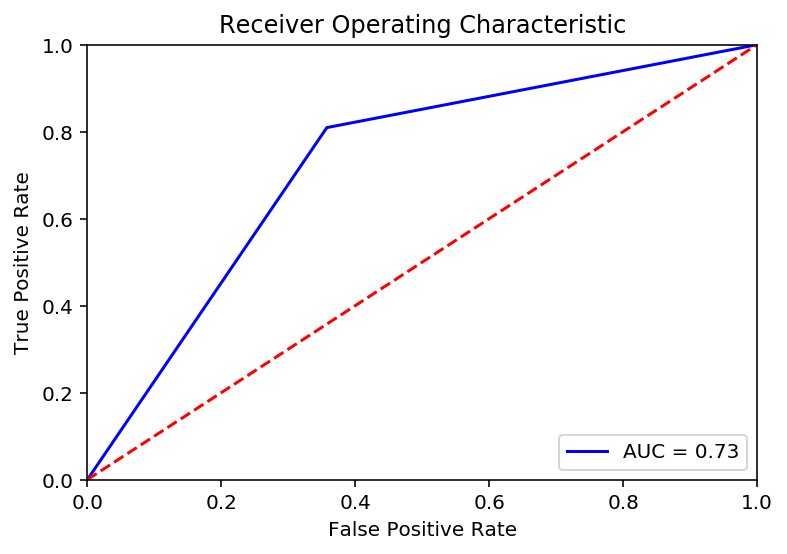

In [25]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
trained_model = classifier2.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)



accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print (" \n KNN :-  ") 
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

print ("\n Confusion Matrix : ")
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print ("\n Classification Report : ")
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred) )

 
 KNN :-  

 mean Accuracy: 
0.761278018767

 Standard Deviation:
0.0101578915887

 Confusion Matrix : 
[[1372  208]
 [ 278  252]]

 Classification Report : 
             precision    recall  f1-score   support

          0       0.83      0.87      0.85      1580
          1       0.55      0.48      0.51       530

avg / total       0.76      0.77      0.76      2110



In [27]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression   #class
classifier3  = LogisticRegression(random_state = 0)

trained_model = classifier3.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)



accuracies = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print (" \n Logistic Regression :-  ") 
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

print ("\n Confusion Matrix : ")
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print ("\n Classification Report : ")
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred) )


 
 Logistic Regression :-  

 mean Accuracy: 
0.799678674157

 Standard Deviation:
0.0100837824732

 Confusion Matrix : 
[[1412  168]
 [ 240  290]]

 Classification Report : 
             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1580
          1       0.63      0.55      0.59       530

avg / total       0.80      0.81      0.80      2110



In [28]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
trained_model = classifier4.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)



accuracies = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print (" \n Decision Tree :-  ") 
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

print ("\n Confusion Matrix : ")
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print ("\n Classification Report : ")
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred) )

 
 Decision Tree :-  

 mean Accuracy: 
0.72897083686

 Standard Deviation:
0.0139605552696

 Confusion Matrix : 
[[1271  309]
 [ 262  268]]

 Classification Report : 
             precision    recall  f1-score   support

          0       0.83      0.80      0.82      1580
          1       0.46      0.51      0.48       530

avg / total       0.74      0.73      0.73      2110



In [29]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier5 = SVC()
trained_model = classifier5.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)



accuracies = cross_val_score(estimator = classifier5, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print (" \n Decision Tree :-  ") 
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

print ("\n Confusion Matrix : ")
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print ("\n Classification Report : ")
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred) )


 
 Decision Tree :-  

 mean Accuracy: 
0.766149885088

 Standard Deviation:
0.0108513398537

 Confusion Matrix : 
[[1476  104]
 [ 343  187]]

 Classification Report : 
             precision    recall  f1-score   support

          0       0.81      0.93      0.87      1580
          1       0.64      0.35      0.46       530

avg / total       0.77      0.79      0.76      2110



In [30]:
from sklearn.ensemble import RandomForestClassifier

seed = 7
num_trees = 150
max_features = 10

classifier6 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
trained_model = classifier6.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)



accuracies = cross_val_score(estimator = classifier6, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print (" \n Bagging using Random Forest : Randomly selected 10 features and 100 forest and then mean accuracy :-  ") 
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print ("\n Classification Report : ")
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred) )


 
 Bagging using Random Forest : Randomly selected 10 features and 100 forest and then mean accuracy :-  

 mean Accuracy: 
0.785246936823

 Standard Deviation:
0.011334423495
[[1409  171]
 [ 263  267]]

 Classification Report : 
             precision    recall  f1-score   support

          0       0.84      0.89      0.87      1580
          1       0.61      0.50      0.55       530

avg / total       0.78      0.79      0.79      2110



In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
num_trees = 100
classifier = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=classifier, n_estimators=num_trees, random_state=seed)
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print (" \n Bagging using decision trees : Randomly selected 100 tress and then mean accuracy :-  " )
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print ("\n Classification Report : ")
print (classification_report(y_test, y_pred) )


 
 Bagging using decision trees : Randomly selected 100 tress and then mean accuracy :-  

 mean Accuracy: 
0.78220435223

 Standard Deviation:
0.0161996661035
[[1409  171]
 [ 263  267]]

 Classification Report : 
             precision    recall  f1-score   support

          0       0.84      0.89      0.87      1580
          1       0.61      0.50      0.55       530

avg / total       0.78      0.79      0.79      2110



In [32]:
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 50
classifier7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
accuracies = cross_val_score(estimator = classifier7, X = X_train, y = y_train, cv = 10)
# demonstrates the construction of 50 decision trees in sequence using the AdaBoost algorithm.
mn=accuracies.mean()
sd=accuracies.std()

print (" \n Boosting using Adaboost : Randomly selected 50 tress and then mean accuracy :-  " )
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print ("\n Classification Report : ")
print (classification_report(y_test, y_pred) )


 
 Boosting using Adaboost : Randomly selected 50 tress and then mean accuracy :-  

 mean Accuracy: 
0.80151165965

 Standard Deviation:
0.0144531092882
[[1409  171]
 [ 263  267]]

 Classification Report : 
             precision    recall  f1-score   support

          0       0.84      0.89      0.87      1580
          1       0.61      0.50      0.55       530

avg / total       0.78      0.79      0.79      2110



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC(probability=True)
estimators.append(('svm', model3))

model4 = GaussianNB()
estimators.append(('NB', model4))

model5 = KNeighborsClassifier()
estimators.append(('Knn', model5))

In [34]:
# create the ensemble model
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

ensemble = VotingClassifier(estimators, voting='soft', weights=[2,2,1,1,3])

accuracies = cross_val_score(estimator = ensemble, X = X_train, y = y_train, cv = 10)

In [35]:
mn=accuracies.mean()
sd=accuracies.std()

print (" \n using voting classifier for Logistic regression, Decision tree, SVM classifier, Gaussian naïve bayes, KNN:-  " )
print ("\n mean Accuracy: ")
print  (mn)

print ("\n Standard Deviation:")
print (sd)

# Making the Confusion Matrix
#from sklearn.metrics import confusion_matrix  #function that returns the matrix
cm = confusion_matrix(y_test, y_pred)
print  (cm)

ensemble.fit(X_test,y_test)
y_pred=ensemble.predict(X_test)
print (classification_report(y_test, y_pred) )

 
 using voting classifier for Logistic regression, Decision tree, SVM classifier, Gaussian naïve bayes, KNN:-  

 mean Accuracy: 
0.773661542421

 Standard Deviation:
0.0138329876389
[[1409  171]
 [ 263  267]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1580
          1       0.94      0.83      0.88       530

avg / total       0.94      0.94      0.94      2110



In [36]:
# Applying truncatedSVD (as PCA does not support sparse matrix for text) 

from sklearn.decomposition import TruncatedSVD
# original data is 48 columns
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)

X= svd.fit_transform(X) # this is not same as old X_train

#print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum()) 



0.999999426374


In [37]:
# so we need to normalize X as after SVD attributes are NOT normalized 

In [38]:
X.shape

(7032, 10)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print ("\n train test split done")

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print ("\n scaling done")


 train test split done

 scaling done


In [40]:
X_train.shape

(5274, 10)

In [41]:
y_train.shape

(5274,)

In [42]:
accuracies = cross_val_score(estimator = ensemble, X = X_train, y = y_train, cv = 10)

In [43]:
mn=accuracies.mean()
sd=accuracies.std()

print (" \n using voting classifier for Logistic regression, Decision tree, SVM classifier, Gaussian naïve bayes, KNN:-  " )
print ("\n mean Accuracy: ")
print  (mn)

print ("\n Standard Deviation:")
print (sd)

ensemble.fit(X_train, y_train)
y_pred=ensemble.predict(X_test)

# Making the Confusion Matrix
#from sklearn.metrics import confusion_matrix  #function that returns the matrix
cm = confusion_matrix(y_test, y_pred)
print  (cm)


print (classification_report(y_test, y_pred) )

 
 using voting classifier for Logistic regression, Decision tree, SVM classifier, Gaussian naïve bayes, KNN:-  

 mean Accuracy: 
0.777204851085

 Standard Deviation:
0.0118314341689
[[1146  165]
 [ 213  234]]
             precision    recall  f1-score   support

          0       0.84      0.87      0.86      1311
          1       0.59      0.52      0.55       447

avg / total       0.78      0.78      0.78      1758



In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline


Using TensorFlow backend.


In [45]:
## we start afresh ( dont take the SVD output )
X = df_with_dummies.drop(['customerID','Churn'],axis=1).values
y = df_with_dummies.iloc[:, 4].values
print(X.shape)
print(y.shape)

(7032, 46)
(7032,)


In [1]:
# baseline model
def create_baseline():
 # create model
    model = Sequential()
    model.add(Dense(46, input_dim=46, kernel_initializer='normal', activation='relu'))
    model.add(Dense(46, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model


In [47]:
# evaluate model with standardized dataset
# fix random seed for reproducibility
import numpy
from keras.optimizers import SGD
from sklearn.pipeline import Pipeline

seed = 7
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=50, batch_size=10, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/50
 - 1s - loss: 0.5017 - acc: 0.7534
Epoch 2/50
 - 1s - loss: 0.4248 - acc: 0.7977
Epoch 3/50
 - 1s - loss: 0.4197 - acc: 0.8005
Epoch 4/50
 - 1s - loss: 0.4140 - acc: 0.8032
Epoch 5/50
 - 1s - loss: 0.4126 - acc: 0.8030
Epoch 6/50
 - 1s - loss: 0.4108 - acc: 0.8064
Epoch 7/50
 - 1s - loss: 0.4083 - acc: 0.8043
Epoch 8/50
 - 1s - loss: 0.4076 - acc: 0.8089
Epoch 9/50
 - 1s - loss: 0.4051 - acc: 0.8066
Epoch 10/50
 - 1s - loss: 0.4048 - acc: 0.8082
Epoch 11/50
 - 1s - loss: 0.4024 - acc: 0.8087
Epoch 12/50
 - 1s - loss: 0.4001 - acc: 0.8146
Epoch 13/50
 - 1s - loss: 0.3987 - acc: 0.8139
Epoch 14/50
 - 1s - loss: 0.3983 - acc: 0.8126
Epoch 15/50
 - 1s - loss: 0.3958 - acc: 0.8165
Epoch 16/50
 - 1s - loss: 0.3959 - acc: 0.8130
Epoch 17/50
 - 1s - loss: 0.3945 - acc: 0.8117
Epoch 18/50
 - 1s - loss: 0.3920 - acc: 0.8169
Epoch 19/50
 - 1s - loss: 0.3917 - acc: 0.8133
Epoch 20/50
 - 1s - loss: 0.3888 - acc: 0.8192
Epoch 21/50
 - 1s - loss: 0.3876 - acc: 0.8178
Epoch 22/50
 - 1s - lo

 - 1s - loss: 0.3791 - acc: 0.8258
Epoch 27/50
 - 1s - loss: 0.3785 - acc: 0.8260
Epoch 28/50
 - 1s - loss: 0.3760 - acc: 0.8274
Epoch 29/50
 - 1s - loss: 0.3751 - acc: 0.8297
Epoch 30/50
 - 1s - loss: 0.3754 - acc: 0.8249
Epoch 31/50
 - 1s - loss: 0.3705 - acc: 0.8320
Epoch 32/50
 - 1s - loss: 0.3709 - acc: 0.8333
Epoch 33/50
 - 1s - loss: 0.3697 - acc: 0.8304
Epoch 34/50
 - 1s - loss: 0.3679 - acc: 0.8306
Epoch 35/50
 - 1s - loss: 0.3651 - acc: 0.8285
Epoch 36/50
 - 1s - loss: 0.3646 - acc: 0.8306
Epoch 37/50
 - 1s - loss: 0.3619 - acc: 0.8342
Epoch 38/50
 - 1s - loss: 0.3611 - acc: 0.8338
Epoch 39/50
 - 1s - loss: 0.3569 - acc: 0.8375
Epoch 40/50
 - 1s - loss: 0.3561 - acc: 0.8377
Epoch 41/50
 - 1s - loss: 0.3560 - acc: 0.8363
Epoch 42/50
 - 1s - loss: 0.3517 - acc: 0.8395
Epoch 43/50
 - 1s - loss: 0.3504 - acc: 0.8372
Epoch 44/50
 - 1s - loss: 0.3486 - acc: 0.8411
Epoch 45/50
 - 1s - loss: 0.3475 - acc: 0.8445
Epoch 46/50
 - 1s - loss: 0.3426 - acc: 0.8436
Epoch 47/50
 - 1s - loss:

In [48]:
results.shape


(5,)

In [49]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 78.10% (0.73%)


In [50]:
## We will try out a different sequence ( not use the scikit pipeline) as we want to draw the graphs


In [51]:
# create model
model = Sequential()
model.add(Dense(46, input_dim=46, kernel_initializer='normal', activation='relu'))
model.add(Dense(46, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model. We manually provide the train and test partition
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=16, verbose=2)
# list all data in history
print(history.history.keys())


Train on 4711 samples, validate on 2321 samples
Epoch 1/150
 - 1s - loss: 4.4643 - acc: 0.7162 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 2/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 3/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 4/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 5/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 6/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 7/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 8/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 9/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 10/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 11/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 12/150
 - 0s - loss:

Epoch 97/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 98/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 99/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 100/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 101/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 102/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 103/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 104/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 105/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 106/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 107/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 108/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_lo

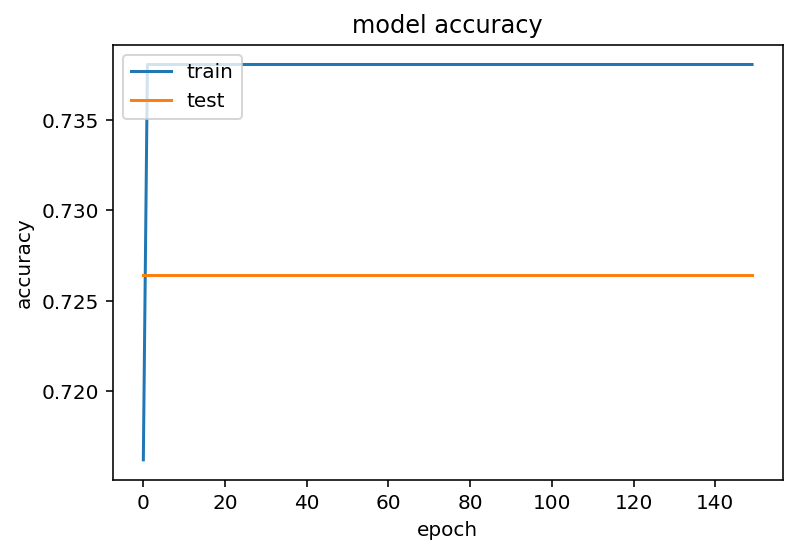

In [52]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



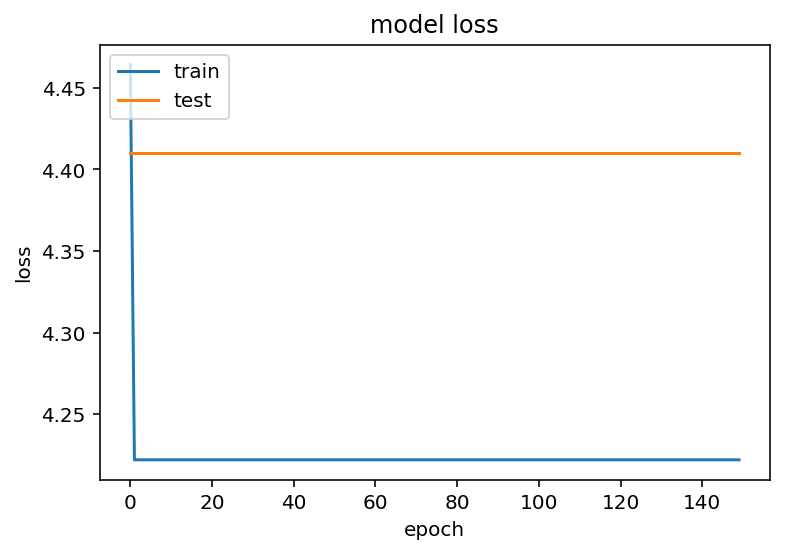

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##  We are also kind of stagnating at % accuracy  

In [54]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [55]:
from keras.layers import Dropout
# create model
model1 = Sequential()
#input layer 
model1.add(Dense(46, input_dim=46, kernel_initializer='normal', activation='relu'))
#drop out 
model1.add(Dropout(0.2))
#hidden layer1 
model1.add(Dense(46, kernel_initializer='normal', activation='relu'))
#drop out 
model1.add(Dropout(0.2))
#output layer 
model1.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
model1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])



In [56]:
# Fit the model. We manually provide the train and test partition
history = model1.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=2)
# list all data in history
print(history.history.keys())


Train on 4711 samples, validate on 2321 samples
Epoch 1/150
 - 1s - loss: 1.4051 - acc: 0.6967 - val_loss: 0.5872 - val_acc: 0.7264
Epoch 2/150
 - 1s - loss: 0.5760 - acc: 0.7381 - val_loss: 0.5870 - val_acc: 0.7264
Epoch 3/150
 - 1s - loss: 0.5760 - acc: 0.7381 - val_loss: 0.5869 - val_acc: 0.7264
Epoch 4/150
 - 1s - loss: 0.5758 - acc: 0.7381 - val_loss: 0.5869 - val_acc: 0.7264
Epoch 5/150
 - 1s - loss: 0.5755 - acc: 0.7381 - val_loss: 0.5878 - val_acc: 0.7264
Epoch 6/150
 - 1s - loss: 0.5757 - acc: 0.7381 - val_loss: 0.5869 - val_acc: 0.7264
Epoch 7/150
 - 1s - loss: 0.5751 - acc: 0.7381 - val_loss: 0.5870 - val_acc: 0.7264
Epoch 8/150
 - 1s - loss: 0.5756 - acc: 0.7381 - val_loss: 0.5870 - val_acc: 0.7264
Epoch 9/150
 - 1s - loss: 0.5755 - acc: 0.7381 - val_loss: 0.5868 - val_acc: 0.7264
Epoch 10/150
 - 1s - loss: 0.5750 - acc: 0.7381 - val_loss: 0.5876 - val_acc: 0.7264
Epoch 11/150
 - 1s - loss: 0.5754 - acc: 0.7381 - val_loss: 0.5877 - val_acc: 0.7264
Epoch 12/150
 - 1s - loss:

Epoch 97/150
 - 1s - loss: 0.5753 - acc: 0.7381 - val_loss: 0.5868 - val_acc: 0.7264
Epoch 98/150
 - 1s - loss: 0.5754 - acc: 0.7381 - val_loss: 0.5869 - val_acc: 0.7264
Epoch 99/150
 - 1s - loss: 0.5754 - acc: 0.7381 - val_loss: 0.5873 - val_acc: 0.7264
Epoch 100/150
 - 1s - loss: 0.5754 - acc: 0.7381 - val_loss: 0.5872 - val_acc: 0.7264
Epoch 101/150
 - 1s - loss: 0.5753 - acc: 0.7381 - val_loss: 0.5882 - val_acc: 0.7264
Epoch 102/150
 - 1s - loss: 0.5754 - acc: 0.7381 - val_loss: 0.5874 - val_acc: 0.7264
Epoch 103/150
 - 1s - loss: 0.5754 - acc: 0.7381 - val_loss: 0.5874 - val_acc: 0.7264
Epoch 104/150
 - 1s - loss: 0.5755 - acc: 0.7381 - val_loss: 0.5872 - val_acc: 0.7264
Epoch 105/150
 - 1s - loss: 0.5755 - acc: 0.7381 - val_loss: 0.5878 - val_acc: 0.7264
Epoch 106/150
 - 1s - loss: 0.5754 - acc: 0.7381 - val_loss: 0.5875 - val_acc: 0.7264
Epoch 107/150
 - 1s - loss: 0.5753 - acc: 0.7381 - val_loss: 0.5868 - val_acc: 0.7264
Epoch 108/150
 - 1s - loss: 0.5756 - acc: 0.7381 - val_lo

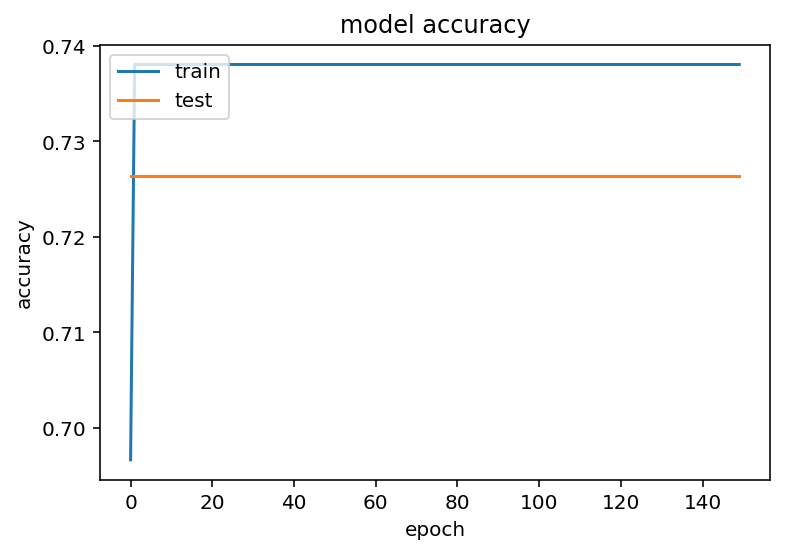

In [57]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


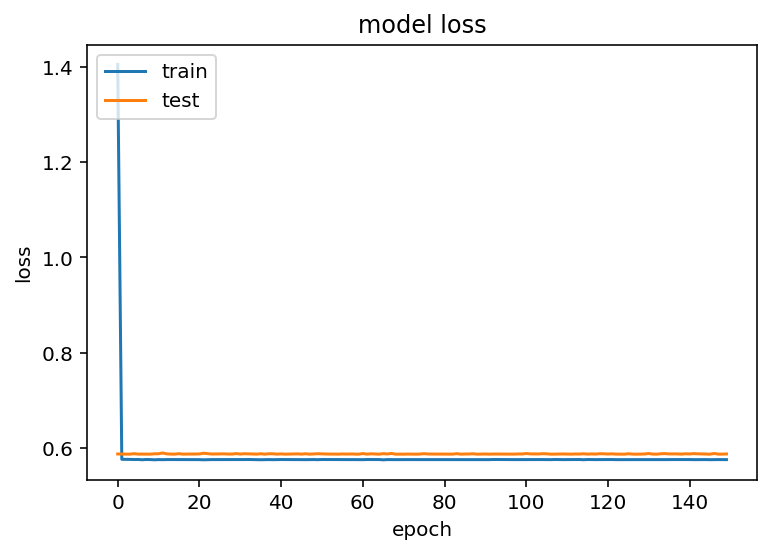

In [58]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
# serialize model to JSON
model1_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model1_json)
# serialize weights to HDF5
model1.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


## We are not successful with drop out (;-)

##### we can use Keras built in time based learning rate 
We can use LR = LR * (1/{decay * epoch})


In [60]:
from keras.layers import Dropout
# create model
model2 = Sequential()
#input layer 
model2.add(Dense(46, input_dim=46, kernel_initializer='normal', activation='relu'))
#drop out 
model2.add(Dropout(0.2))
#hidden layer1 
model2.add(Dense(46, kernel_initializer='normal', activation='relu'))
#drop out 
model2.add(Dropout(0.2))
#output layer 
model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

epochs = 150
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model2.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])



In [61]:

# Fit the model
history=model2.fit(X, y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)
# list all data in history
print(history.history.keys())



Train on 4711 samples, validate on 2321 samples
Epoch 1/150
 - 1s - loss: 4.2080 - acc: 0.7357 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 2/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 3/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 4/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 5/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 6/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 7/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 8/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 9/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 10/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 11/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 12/150
 - 0s - loss:

Epoch 97/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 98/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 99/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 100/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 101/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 102/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 103/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 104/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 105/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 106/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 107/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_loss: 4.4097 - val_acc: 0.7264
Epoch 108/150
 - 0s - loss: 4.2220 - acc: 0.7381 - val_lo

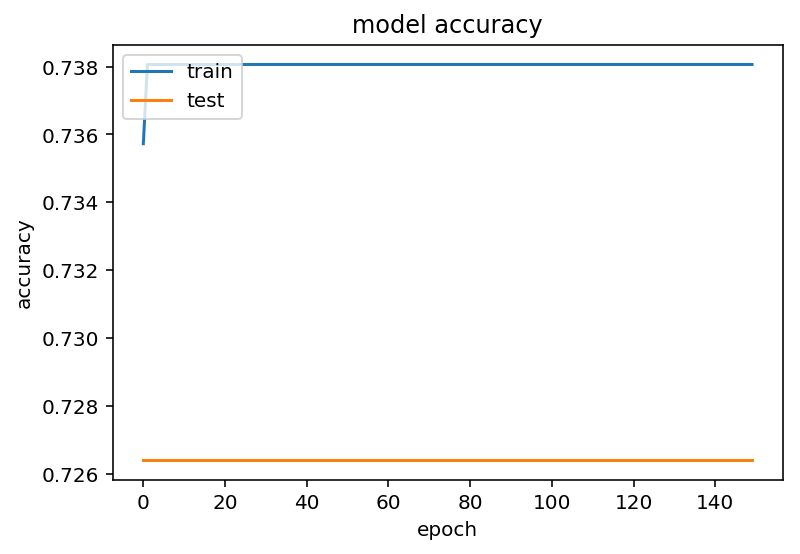

In [62]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

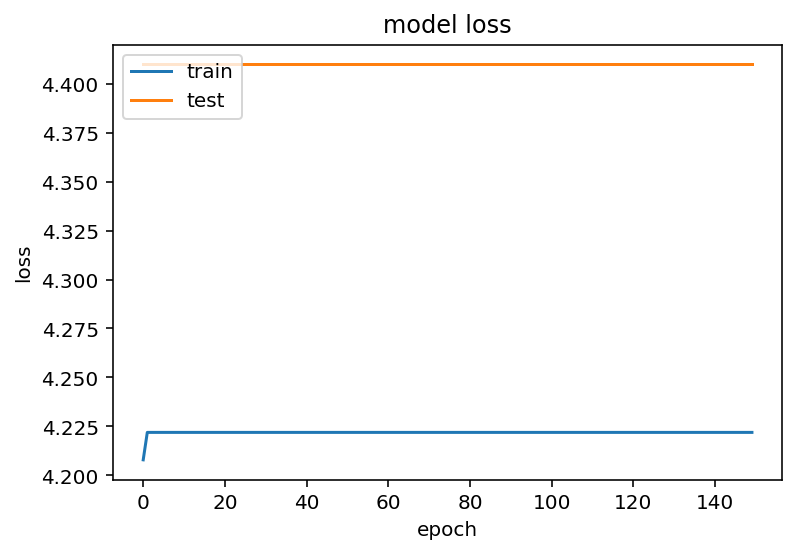

In [63]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
# serialize model to JSON
model2_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model2_json)
# serialize weights to HDF5
model2.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


In [65]:
# load json and create model
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model2.h5")
print("Loaded model from disk")


Loaded model from disk
